# Data Cleaning and Visualization with Generative AI Assistance


**=============================================================================================**

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


import datetime
from datetime import datetime, timedelta, date, time

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**==============================================================================================**

## Data Acquisition and Exploration (20 minutes)

In [2]:
df = pd.read_csv("retail_sales.csv", parse_dates=["Invoice Date"])

In [3]:
df.head()

,Retailer Name,Retailer ID,Invoice Date,Region,State,District,Product,Price per Unit (INR),Units Sold,Total Sales (INR),Operating Profit (INR),Sales Method
0,Prime Step Store,95425,2018-06-09,South,Karnataka,Bengaluru,Sneakers,2260,57,128820,36869.16,Offline
1,Best Path Emporium,40826,2018-12-22,North,Punjab,Jalandhar,Sandals,4792,33,158136,25677.74,Online
2,Prime Walk Boutique,83635,2022-06-12,North,Punjab,Amritsar,Heels,3795,65,246675,51524.13,Online
3,Top Footwear Co,33817,2019-03-22,South,Karnataka,Hubli,Heels,1462,93,135966,37666.69,Offline
4,Fresh Style Boutique,48028,2019-08-14,East,West Bengal,Howrah,Sneakers,4034,26,104884,15143.36,Online


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Retailer Name           5000 non-null   object        
 1   Retailer ID             5000 non-null   int64         
 2   Invoice Date            5000 non-null   datetime64[ns]
 3   Region                  5000 non-null   object        
 4   State                   5000 non-null   object        
 5   District                5000 non-null   object        
 6   Product                 5000 non-null   object        
 7   Price per Unit (INR)    5000 non-null   int64         
 8   Units Sold              5000 non-null   int64         
 9   Total Sales (INR)       5000 non-null   int64         
 10  Operating Profit (INR)  5000 non-null   float64       
 11  Sales Method            5000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), obje

In [5]:
# Descriptive Statistical Analysis
df.describe(include="all")

,Retailer Name,Retailer ID,Invoice Date,Region,State,District,Product,Price per Unit (INR),Units Sold,Total Sales (INR),Operating Profit (INR),Sales Method
count,5000,5000.00,5000,5000,5000,5000,5000,5000.00,5000.00,5000.00,5000.00,5000
unique,200,NaN,1961,4,5,15,5,NaN,NaN,NaN,NaN,2
top,Best Fashion Company,NaN,2022-11-18 00:00:00,South,Maharashtra,Kolkata,Sneakers,NaN,NaN,NaN,NaN,Online
freq,41,NaN,10,1983,1030,364,1051,NaN,NaN,NaN,NaN,2560
first,NaN,NaN,2017-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2023-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,53724.40,NaN,NaN,NaN,NaN,NaN,2769.09,50.28,139474.01,27832.10,NaN
std,NaN,25430.73,NaN,NaN,NaN,NaN,NaN,1306.42,28.58,109890.62,24072.26,NaN
min,NaN,10423.00,NaN,NaN,NaN,NaN,NaN,500.00,1.00,540.00,100.20,NaN
25%,NaN,31367.25,NaN,NaN,NaN,NaN,NaN,1659.75,26.00,50590.50,9417.56,NaN


**=====================================================================================**

## Data Cleaning with Generative AI (40 minutes):

In [6]:
df.columns

Index(['Retailer Name', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'District', 'Product', 'Price per Unit (INR)', 'Units Sold', 'Total Sales (INR)', 'Operating Profit (INR)', 'Sales Method'], dtype='object')

In [7]:
df.isna().sum()

Retailer Name             0
Retailer ID               0
Invoice Date              0
Region                    0
State                     0
District                  0
Product                   0
Price per Unit (INR)      0
Units Sold                0
Total Sales (INR)         0
Operating Profit (INR)    0
Sales Method              0
dtype: int64

From GenAI



Here are some potential data inconsistencies:

Retailer Name: There are 200 unique retailer names, with the most frequent being 'Best Fashion Company' appearing 41 times. This column seems consistent.

Retailer ID: The IDs range from 10423 to 99670. There doesn't seem to be any inconsistencies here.

Invoice Date: There are 1961 unique dates, with the most frequent being '11/18/2022' appearing 10 times. This column seems consistent.

Region, State, District: These are categorical variables and seem to be consistent.

Product: There are 5 unique products, with the most frequent being 'Sneakers'. This column seems consistent.

Price per Unit (INR): The prices range from 500 to 4998 INR. There doesn't seem to be any inconsistencies here.

Units Sold: The number of units sold range from 1 to 99. There doesn't seem to be any inconsistencies here.

Total Sales (INR): The total sales range from 540 to 494208 INR. There doesn't seem to be any inconsistencies here.

Operating Profit (INR): The operating profit ranges from 100.19 to 129921.76 INR. There doesn't seem to be any inconsistencies here.

Sales Method: There are 2 unique sales methods, with the most frequent being 'Online'. This column seems consistent.

In summary, there doesn't seem to be any obvious outliers or invalid entries in the data. However, a more thorough analysis might be needed to confirm this.

## Data Visualization with Generative AI (40 minutes):

In [8]:
df.head()

,Retailer Name,Retailer ID,Invoice Date,Region,State,District,Product,Price per Unit (INR),Units Sold,Total Sales (INR),Operating Profit (INR),Sales Method
0,Prime Step Store,95425,2018-06-09,South,Karnataka,Bengaluru,Sneakers,2260,57,128820,36869.16,Offline
1,Best Path Emporium,40826,2018-12-22,North,Punjab,Jalandhar,Sandals,4792,33,158136,25677.74,Online
2,Prime Walk Boutique,83635,2022-06-12,North,Punjab,Amritsar,Heels,3795,65,246675,51524.13,Online
3,Top Footwear Co,33817,2019-03-22,South,Karnataka,Hubli,Heels,1462,93,135966,37666.69,Offline
4,Fresh Style Boutique,48028,2019-08-14,East,West Bengal,Howrah,Sneakers,4034,26,104884,15143.36,Online


Here are some suggestions for visualizing the data:

Bar Chart for Sales Method: You can create a bar chart to visualize the frequency of each sales method (Online and Offline). This will give you an idea of which sales method is more popular.

Histogram for Units Sold: A histogram can be used to visualize the distribution of the number of units sold. This will give you an idea of the most common number of units sold per transaction.

Scatter Plot for Price per Unit vs Units Sold: A scatter plot can be used to visualize the relationship between the price per unit and the number of units sold. This can help identify if there's a trend where more units are sold for cheaper products.

Box Plot for Operating Profit: A box plot can be used to visualize the distribution of the operating profit. This can help identify any potential outliers in the data.

Heatmap for Correlation: A heatmap can be used to visualize the correlation between the numerical variables in the data. This can help identify any potential relationships between the variables.


**==============================================================================================================**

## Data Visualization

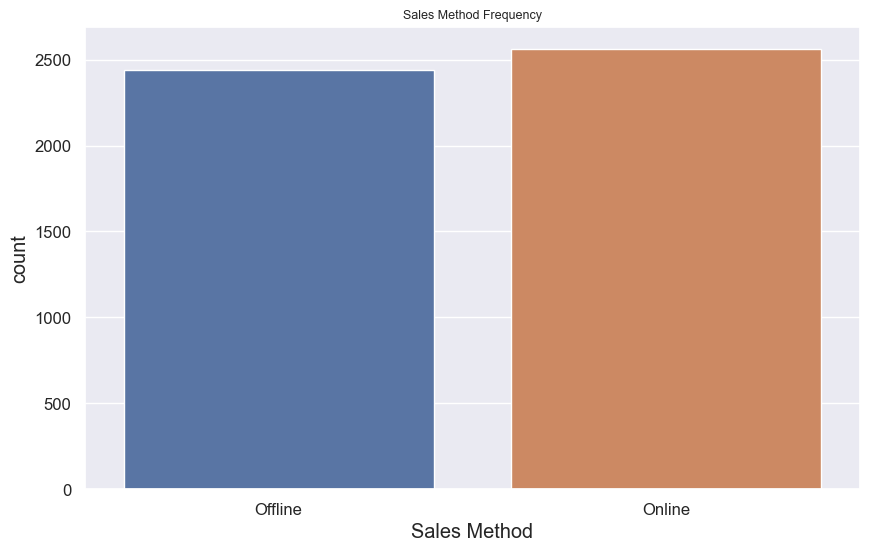

In [9]:
# Bar Chart for Sales Method

plt.figure(figsize=(10,6))

sns.countplot(x='Sales Method', data=df)

plt.title('Sales Method Frequency')

#plt.savefig('output/sales-method-frequency-8f5638.png')

plt.show()

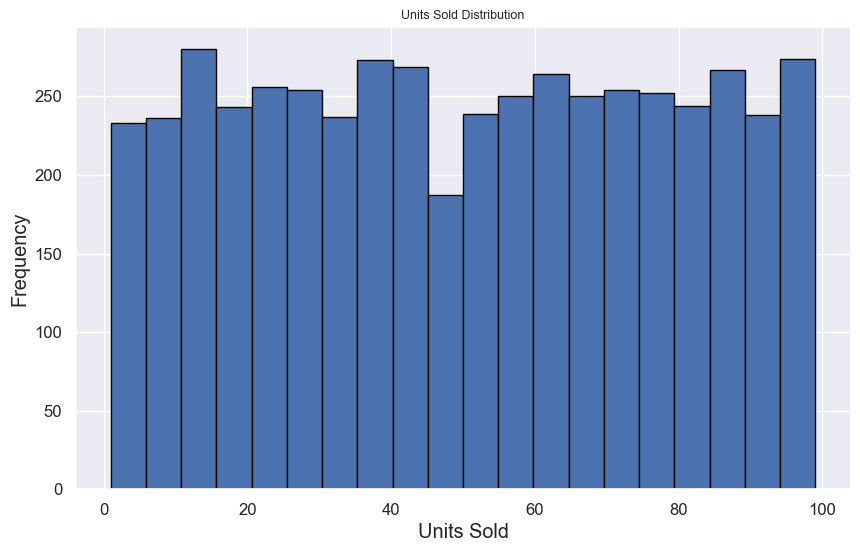

In [10]:
# Histogram for Units Sold

plt.figure(figsize=(10,6))

plt.hist(df['Units Sold'], bins=20, edgecolor='black')

plt.title('Units Sold Distribution')

plt.xlabel('Units Sold')

plt.ylabel('Frequency')
plt.show()

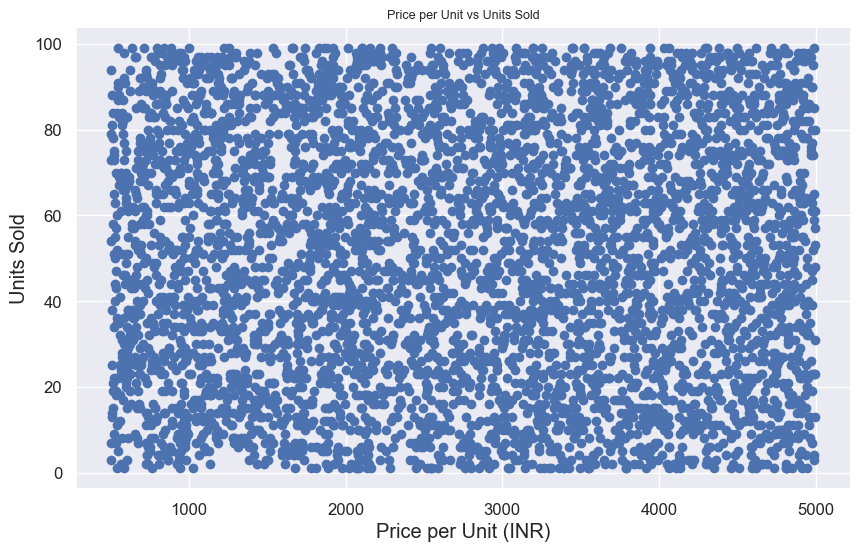

In [11]:
# Scatter Plot for Price per Unit vs Units Sold

plt.figure(figsize=(10,6))

plt.scatter(df['Price per Unit (INR)'], df['Units Sold'])

plt.title('Price per Unit vs Units Sold')

plt.xlabel('Price per Unit (INR)')

plt.ylabel('Units Sold')

plt.show()

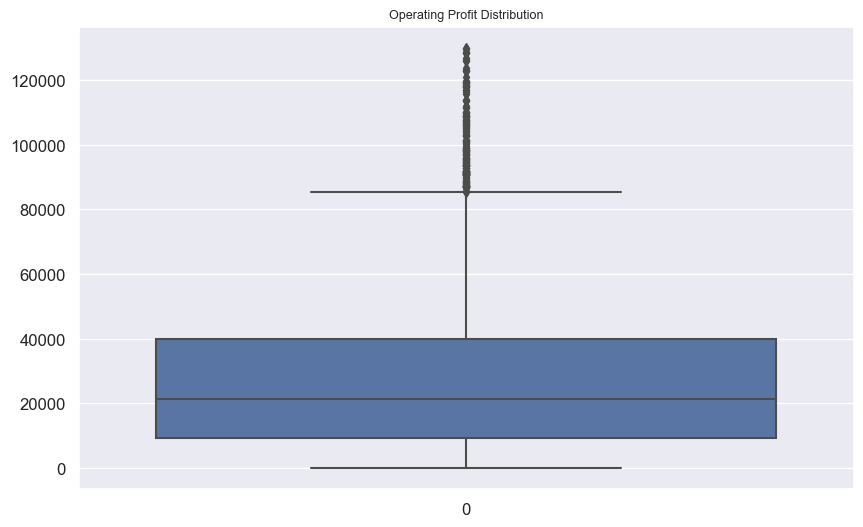

In [12]:
# Box Plot for Operating Profit

plt.figure(figsize=(10,6))

sns.boxplot(df['Operating Profit (INR)'])

plt.title('Operating Profit Distribution')

plt.show()

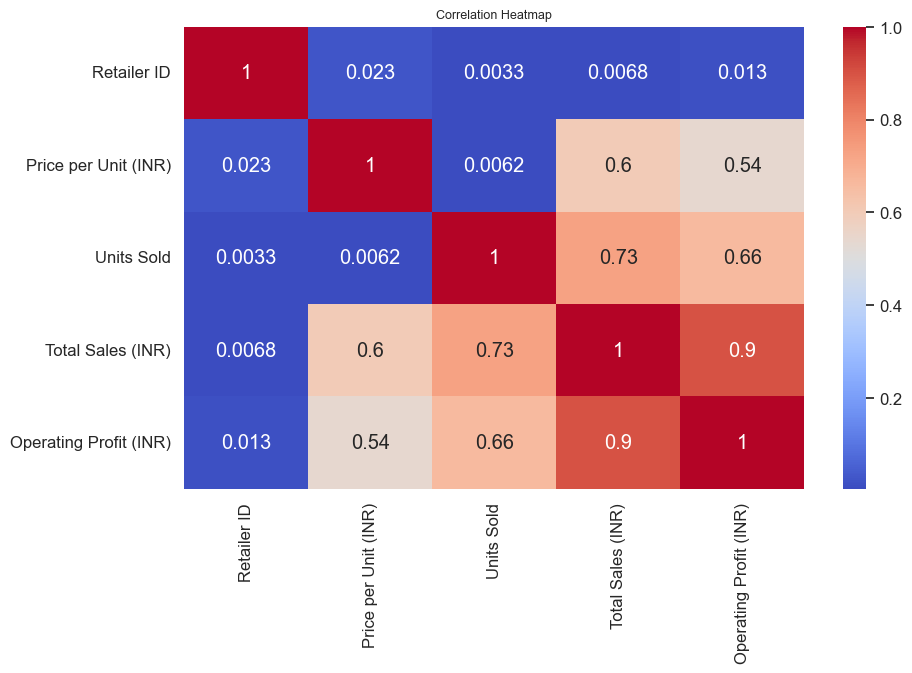

In [13]:
# Heatmap for Correlation

plt.figure(figsize=(10,6))

corr = df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')

plt.show()

**==============================================================================================================**

## Reflection (20 minutes):

### Data Cleaning Steps and Rationale:

- The first step in data cleaning was to check for missing values in the dataframe. This is important because missing values can lead to incorrect analysis and visualizations. In this case, there were no missing values in the dataframe.

- The next step was to identify potential data inconsistencies such as outliers or invalid entries. This is crucial because outliers can significantly skew the results of the analysis. In this case, there didn't seem to be any obvious outliers or invalid entries in the data.

- It's important to note that data cleaning is an iterative process and more thorough analysis might be needed to confirm the absence of inconsistencies.

### Limitations of Relying Solely on AI Suggestions for Code Completion:

While AI can be a powerful tool for code completion, it's not without its limitations. Here are a few:

- Context Understanding: AI might not fully understand the context or the specific requirements of the code. It can suggest code based on patterns it has learned, but it might not always be the most efficient or appropriate solution.

- Error Handling: AI might not be able to handle errors or exceptions in the code as effectively as a human developer. It can suggest code that works in most cases, but there might be edge cases that it doesn't account for.

- Code Optimization: AI can suggest code that works, but it might not be the most optimized solution. A human developer with a deep understanding of the programming language and the problem at hand might be able to write more efficient code.

### Data Visualization and Insights:

The chosen visualizations provide valuable insights into the sales data:

- The bar chart for sales method shows the frequency of each sales method. This can help understand which sales method is more popular.

- The histogram for units sold shows the distribution of the number of units sold. This can help understand the most common number of units sold per transaction.

- The scatter plot for price per unit vs units sold can help identify if there's a trend where more units are sold for cheaper products.

- The box plot for operating profit can help identify any potential outliers in the data.

- The heatmap for correlation can help identify any potential relationships between the variables. For example, there might be a strong correlation between the price per unit and the total sales, which would indicate that higher-priced products generate more sales.


#### Python code done by Dennis Lam